# 필요한 라이브러리 생성

In [4]:
import numpy as np # 선형대수 계산 이용
import pandas as pd # 데이터 처리, 엑셀파일 임출력 (e.g. pd.read_csv)

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

import seaborn as sns


import warnings
warnings.filterwarnings("ignore")



# 원본데이터 로드

In [5]:
fastcampus = pd.read_excel("C:/Users/user/Documents/EDA 프로젝트/fast.xlsx")

print(fastcampus)

             id  customer_id  course_id     type      state  \
0        970634     504760.0   201435.0    ORDER  CANCELLED   
1        970650     432862.0   203178.0    ORDER  CANCELLED   
2        970657      72297.0   204246.0  PAYMENT  COMPLETED   
3        970656      72297.0   204246.0    ORDER  CANCELLED   
4        970658     478028.0   201797.0  PAYMENT  COMPLETED   
...         ...          ...        ...      ...        ...   
105414  1364995     640697.0   205365.0  PAYMENT  CANCELLED   
105415  1364998     670896.0   204159.0  PAYMENT  CANCELLED   
105416  1364996     640697.0   205365.0  PAYMENT  COMPLETED   
105417  1365005     670896.0   204159.0  PAYMENT  CANCELLED   
105418  1365007     610626.0   206720.0  PAYMENT  COMPLETED   

                           course_title category_title  format  \
0             올인원 패키지 : 알고리즘 기술면접 완전 정복          프로그래밍     올인원   
1           초격차 패키지 : 한번에 끝내는 영상 촬영과 편집          영상/3D     올인원   
2                  시크릿코드 : 프론트엔드 실무 완성편      

# 데이터 정보요소 보기

In [3]:
fastcampus.columns  # 컬럼 정보 알기

Index(['id', 'customer_id', 'course_id', 'type', 'state', 'course_title',
       'category_title', 'format', 'completed_at', 'transaction_amount',
       'coupon_title', 'coupon_discount_amount', 'sale_price',
       'tax_free_amount', 'pg', 'method', 'subcategory_title',
       'marketing_start_at'],
      dtype='object')

In [4]:
fastcampus.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14


In [5]:
fastcampus.tail()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
105414,1364995,640697.0,205365.0,PAYMENT,CANCELLED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:10:42,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,116000.0,INICIS,TRANS,영상 편집,2021-06-15
105415,1364998,670896.0,204159.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:16:33,189000,NaN,NaN,189000.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10
105416,1364996,640697.0,205365.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15
105417,1365005,670896.0,204159.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:19:56,189000,NaN,NaN,189000.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10
105418,1365007,610626.0,206720.0,PAYMENT,COMPLETED,용호수의 돈 버는 실전 영상 제작,영상/3D,올인원,2021-09-25 14:25:47,139000,[WELCOME] 온라인 강의 3만원 할인쿠폰,30000.0,169000.0,169000.0,NAVER,POINT,영상 편집,2021-08-17


In [6]:
fastcampus.shape # 행의개수, 열의 개수

(105419, 18)

In [4]:
fastcampus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105419 entries, 0 to 105418
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      105419 non-null  int64         
 1   customer_id             105416 non-null  float64       
 2   course_id               100212 non-null  float64       
 3   type                    105419 non-null  object        
 4   state                   105419 non-null  object        
 5   course_title            105403 non-null  object        
 6   category_title          105395 non-null  object        
 7   format                  105403 non-null  object        
 8   completed_at            105419 non-null  datetime64[ns]
 9   transaction_amount      105419 non-null  int64         
 10  coupon_title            31817 non-null   object        
 11  coupon_discount_amount  31817 non-null   float64       
 12  sale_price              104291

In [5]:
fastcampus.isnull().sum()

id                            0
customer_id                   3
course_id                  5207
type                          0
state                         0
course_title                 16
category_title               24
format                       16
completed_at                  0
transaction_amount            0
coupon_title              73602
coupon_discount_amount    73602
sale_price                 1128
tax_free_amount            1128
pg                        15075
method                    13096
subcategory_title         19829
marketing_start_at        17979
dtype: int64

# 데이터 전처리

In [7]:
fastcampus_copy = fastcampus.copy()

fastcampus_copy

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105414,1364995,640697.0,205365.0,PAYMENT,CANCELLED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:10:42,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,116000.0,INICIS,TRANS,영상 편집,2021-06-15
105415,1364998,670896.0,204159.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:16:33,189000,NaN,NaN,189000.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10
105416,1364996,640697.0,205365.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15
105417,1365005,670896.0,204159.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:19:56,189000,NaN,NaN,189000.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10


In [8]:
fastcampus_copy['coupon_title'] = fastcampus_copy['coupon_title'].fillna('없음')
fastcampus_copy['coupon_discount_amount'] = fastcampus_copy['coupon_discount_amount'].fillna(0)  
fastcampus_copy['subcategory_title'] = fastcampus_copy['subcategory_title'].fillna('없음')
fastcampus_copy

# 쿠폰할인 금액을 실수에서 정수로 바꾸는 방법은??

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,없음,0.0,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,없음,0.0,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,없음,2021-03-04
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,없음,0.0,190900.0,190900.0,NaN,CARD,없음,2021-03-04
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105414,1364995,640697.0,205365.0,PAYMENT,CANCELLED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:10:42,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,116000.0,INICIS,TRANS,영상 편집,2021-06-15
105415,1364998,670896.0,204159.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:16:33,189000,없음,0.0,189000.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10
105416,1364996,640697.0,205365.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15
105417,1365005,670896.0,204159.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:19:56,189000,없음,0.0,189000.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10


# 결측치 처리 1

In [9]:
fastcampus_copy = fastcampus_copy.drop(['course_id', 'tax_free_amount'], axis=1) # 분석에 필요없는 변수는 제거

In [10]:
fastcampus_copy = fastcampus_copy.dropna(subset = ['category_title','marketing_start_at'])
# fastcampus_copy.dropna(subset = ['marketing_start_at'])
fastcampus_copy

,id,customer_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
1,970650,432862.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,없음,0.0,116000.0,NaN,CARD,영상 편집,2020-12-02
2,970657,72297.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,NaN,CARD,없음,2021-03-04
3,970656,72297.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,없음,0.0,190900.0,NaN,CARD,없음,2021-03-04
4,970658,478028.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14
5,970655,478028.0,ORDER,CANCELLED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:56,97500,없음,0.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105414,1364995,640697.0,PAYMENT,CANCELLED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:10:42,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,INICIS,TRANS,영상 편집,2021-06-15
105415,1364998,670896.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:16:33,189000,없음,0.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10
105416,1364996,640697.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15
105417,1365005,670896.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:19:56,189000,없음,0.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10


# 결측치 처리2

In [11]:
fastcampus_copy['coupon_title'] = fastcampus_copy['coupon_title'].fillna('없음')
fastcampus_copy['coupon_discount_amount'] = fastcampus_copy['coupon_discount_amount'].fillna(0)  
fastcampus_copy['subcategory_title'] = fastcampus_copy['subcategory_title'].fillna('없음')
fastcampus_copy['sale_price'] = fastcampus_copy['sale_price'].fillna('transaction_amount')
fastcampus_copy['pg'] = fastcampus_copy['pg'].fillna('TOSS')
fastcampus_copy['sale_price'].fillna('transaction_amount')
fastcampus_copy['method'] = fastcampus_copy['method'].fillna('CASH')
fastcampus_copy

# 쿠폰할인 금액을 실수에서 정수로 바꾸는 방법은??

,id,customer_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
1,970650,432862.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,없음,0.0,116000.0,TOSS,CARD,영상 편집,2020-12-02
2,970657,72297.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,TOSS,CARD,없음,2021-03-04
3,970656,72297.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,없음,0.0,190900.0,TOSS,CARD,없음,2021-03-04
4,970658,478028.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,TOSS,CARD,PPT/보고서,2019-11-14
5,970655,478028.0,ORDER,CANCELLED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:56,97500,없음,0.0,117500.0,TOSS,CARD,PPT/보고서,2019-11-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105414,1364995,640697.0,PAYMENT,CANCELLED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:10:42,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,INICIS,TRANS,영상 편집,2021-06-15
105415,1364998,670896.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:16:33,189000,없음,0.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10
105416,1364996,640697.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15
105417,1365005,670896.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:19:56,189000,없음,0.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10


In [12]:
fastcampus_copy.isnull().sum()

id                        0
customer_id               0
type                      0
state                     0
course_title              0
category_title            0
format                    0
completed_at              0
transaction_amount        0
coupon_title              0
coupon_discount_amount    0
sale_price                0
pg                        0
method                    0
subcategory_title         0
marketing_start_at        0
dtype: int64

In [68]:
fastcampus_copy['customer_id'][fastcampus_copy['customer_id'].isna()]

Series([], Name: customer_id, dtype: float64)

In [62]:
# fastcampus_copy.iloc[[12133, 36367, 91500]]

In [ ]:
fastcampus_copy[]

In [13]:
fastcampus_copy = fastcampus_copy.astype({'customer_id':'int'})
fastcampus_copy

,id,customer_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
1,970650,432862,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,없음,0.0,116000.0,TOSS,CARD,영상 편집,2020-12-02
2,970657,72297,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,TOSS,CARD,없음,2021-03-04
3,970656,72297,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,없음,0.0,190900.0,TOSS,CARD,없음,2021-03-04
4,970658,478028,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,TOSS,CARD,PPT/보고서,2019-11-14
5,970655,478028,ORDER,CANCELLED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:56,97500,없음,0.0,117500.0,TOSS,CARD,PPT/보고서,2019-11-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105414,1364995,640697,PAYMENT,CANCELLED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:10:42,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,INICIS,TRANS,영상 편집,2021-06-15
105415,1364998,670896,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:16:33,189000,없음,0.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10
105416,1364996,640697,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15
105417,1365005,670896,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:19:56,189000,없음,0.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10


In [14]:
fastcampus_copy.dtypes

id                                 int64
customer_id                        int32
type                              object
state                             object
course_title                      object
category_title                    object
format                            object
completed_at              datetime64[ns]
transaction_amount                 int64
coupon_title                      object
coupon_discount_amount           float64
sale_price                        object
pg                                object
method                            object
subcategory_title                 object
marketing_start_at        datetime64[ns]
dtype: object

In [16]:
fastcampus_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87440 entries, 1 to 105418
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      87440 non-null  int64         
 1   customer_id             87440 non-null  float64       
 2   type                    87440 non-null  object        
 3   state                   87440 non-null  object        
 4   course_title            87440 non-null  object        
 5   category_title          87440 non-null  object        
 6   format                  87440 non-null  object        
 7   completed_at            87440 non-null  datetime64[ns]
 8   transaction_amount      87440 non-null  int64         
 9   coupon_title            87440 non-null  object        
 10  coupon_discount_amount  87440 non-null  float64       
 11  sale_price              87440 non-null  object        
 12  pg                      87440 non-null  objec

In [254]:
# sns.pairplot()

In [83]:
fastcampus['subcategory_title'].unique()

array(['개발자 커리어', '영상 편집', nan, 'PPT/보고서', '금융/투자 실무', '프론트엔드 개발',
       'DevOps', 'UX/UI', '머신러닝', '모션그래픽', '딥러닝/인공지능', '글쓰기/카피라이팅',
       '디지털마케팅', '엑셀/VBA', '데이터분석', '디자인툴', '모바일앱', '업무자동화', 'SNS마케팅',
       '게임', '회계/재무/세무', '부동산 개발', '시각디자인', '백엔드 개발', '데이터마케팅', '일러스트',
       '부동산 투자', '코딩 입문', '커뮤니케이션', '리더십', '주식 투자', '게임 그래픽', '데이터엔지니어링',
       'VFX'], dtype=object)

# 연관관계분석  프로그래밍과 고객간의 분석

In [13]:
col_dup = fastcampus_copy['customer_id'].duplicated().sum()
col_dup  # 중복된거를 넣어서 데이터 분석을 할지 고민된다. 그냥 중복된것도 하나의 고객으로 인정해서 생각해보자.

41324

In [14]:
fastcampus_copy = fastcampus_copy.replace("데이터 사이언스", "데이터사이언스")
fastcampus_copy

,id,customer_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
1,970650,432862.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,없음,0.0,116000.0,TOSS,CARD,영상 편집,2020-12-02
2,970657,72297.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,TOSS,CARD,없음,2021-03-04
3,970656,72297.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,없음,0.0,190900.0,TOSS,CARD,없음,2021-03-04
4,970658,478028.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,TOSS,CARD,PPT/보고서,2019-11-14
5,970655,478028.0,ORDER,CANCELLED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:56,97500,없음,0.0,117500.0,TOSS,CARD,PPT/보고서,2019-11-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105414,1364995,640697.0,PAYMENT,CANCELLED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:10:42,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,INICIS,TRANS,영상 편집,2021-06-15
105415,1364998,670896.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:16:33,189000,없음,0.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10
105416,1364996,640697.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15
105417,1365005,670896.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:19:56,189000,없음,0.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10


In [93]:
fastcampus_copy2['customer_id'].sort_index(ascending=False)

87439    610626
87438    670896
87437    640697
87436    670896
87435    640697
          ...  
4        478028
3        478028
2         72297
1         72297
0        432862
Name: customer_id, Length: 87440, dtype: int32

In [101]:
fastcampus_copy2_tmp['category_title']

0         영상/3D
1         프로그래밍
2         프로그래밍
3        업무 생산성
4        업무 생산성
          ...  
87435     영상/3D
87436    부동산/금융
87437     영상/3D
87438    부동산/금융
87439     영상/3D
Name: category_title, Length: 87440, dtype: object

In [59]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [110]:
fastcampus_copy2_tmp.sort_values(by="customer_id")

,customer_id,category_title
18010,16,프로그래밍
22168,46,프로그래밍
22169,46,프로그래밍
19039,47,데이터사이언스
59334,47,데이터사이언스
...,...,...
87429,670837,프로그래밍
87431,670874,마케팅
87434,670891,프로그래밍
87436,670896,부동산/금융


In [108]:
fastcampus_copy2_tmp['customer_id'][0]

432862

In [109]:
fastcampus_copy2_tmp['category_title']

0         영상/3D
1         프로그래밍
2         프로그래밍
3        업무 생산성
4        업무 생산성
          ...  
87435     영상/3D
87436    부동산/금융
87437     영상/3D
87438    부동산/금융
87439     영상/3D
Name: category_title, Length: 87440, dtype: object

# 연관분석 시작 APri

In [26]:
# fastcampus_copy_tmp=fastcampus_copy[['customer_id','category_title']]
# fastcampus_copy_tmp_arr=[[] for i in range(len(fastcampus_copy_tmp))]

# num=0
# for i in fastcampus_copy_tmp['category_title']:
#     fastcampus_copy_tmp_arr[fastcampus_copy_tmp['customer_id'][num]].append(i)
#     continue
#     num+=1

In [68]:
fastcampus_copy['category_title'].unique()

array(['영상/3D', '프로그래밍', '업무 생산성', '부동산/금융', '크리에이티브', '디자인', '데이터사이언스',
       '마케팅', '투자/재테크', '비즈니스', '지식콘텐츠', '교육'], dtype=object)

In [118]:
category = [['프로', '데이', '업무'],
            ['업무', '교육', '데이', '비즈'], 
            ['마케', '프로', '업무'],
            ['업무', '교육', '데이', '영상']]

In [119]:
te = TransactionEncoder()
te_ary = te.fit(category).transform(category)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,교육,데이,마케,비즈,업무,영상,프로
0,False,True,False,False,True,False,True
1,True,True,False,True,True,False,False
2,False,False,True,False,True,False,True
3,True,True,False,False,True,True,False


In [120]:
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.50,(교육)
1,0.75,(데이)
2,1.00,(업무)
3,0.50,(프로)
4,0.50,"(데이, 교육)"
5,0.50,"(업무, 교육)"
6,0.75,"(데이, 업무)"
7,0.50,"(프로, 업무)"
8,0.50,"(데이, 업무, 교육)"


In [121]:
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(데이),(교육),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5
1,(교육),(데이),0.50,0.75,0.50,1.000000,1.333333,0.125,inf
2,(업무),(교육),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0
3,(교육),(업무),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
4,(데이),(업무),0.75,1.00,0.75,1.000000,1.000000,0.000,inf
5,(업무),(데이),1.00,0.75,0.75,0.750000,1.000000,0.000,1.0
6,(프로),(업무),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
7,(업무),(프로),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0
8,"(데이, 업무)",(교육),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5
9,"(데이, 교육)",(업무),0.50,1.00,0.50,1.000000,1.000000,0.000,inf


In [1]:
# sns.heatmap(frequent_itemsets, annot=True, cmap='Set2')

In [81]:
fastcampus_copy.customer_id.value_counts().to_frame()

,customer_id
98685,69
50769,51
40783,50
23171,50
427973,48
...,...
535811,1
4310,1
18462,1
549787,1


# 데이터 분석 상관관계 분석

In [39]:
fastcampus_copy.corr(method='pearson')

,id,customer_id,transaction_amount,coupon_discount_amount
id,1.000000,0.192636,0.100821,0.095807
customer_id,0.192636,1.000000,0.010855,-0.034682
transaction_amount,0.100821,0.010855,1.000000,-0.154259
coupon_discount_amount,0.095807,-0.034682,-0.154259,1.000000


<AxesSubplot:title={'center':'Correlation to numbric columns'}>

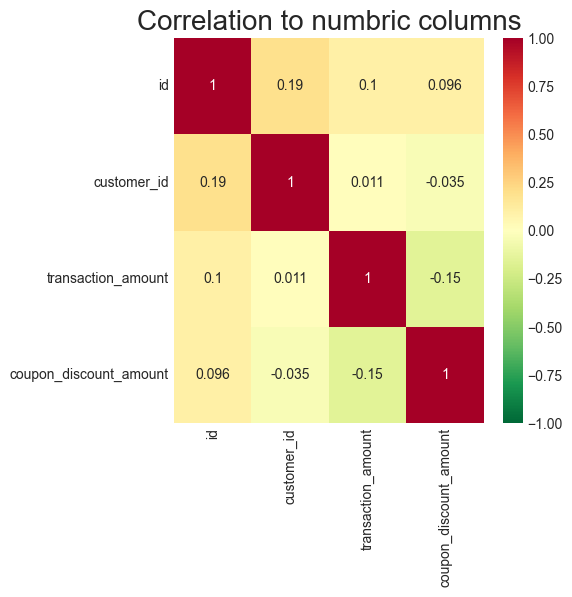

In [47]:
#heatmap으로 상관관계를 표시
import seaborn as sns
plt.rcParams["figure.figsize"] = (5,5)
plt.title('Correlation to numbric columns', fontsize=20)
sns.heatmap(fastcampus_copy.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'RdYlGn_r',
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )
